# 数据可视化作业题目

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
# 年份，月份，乘客数
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'The number of passengers in each year')

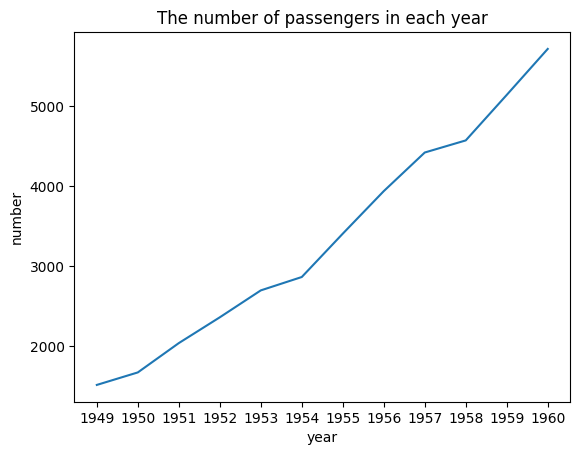

In [3]:
data1 = data.groupby('year', observed=False)['passengers'].sum()
plt.plot(data1.index,data1)
plt.xticks(list(range(1949,1961)))
plt.xlabel('year')
plt.ylabel('number')
plt.title('The number of passengers in each year')

Text(0.5, 1.0, 'The number of passengers in each month')

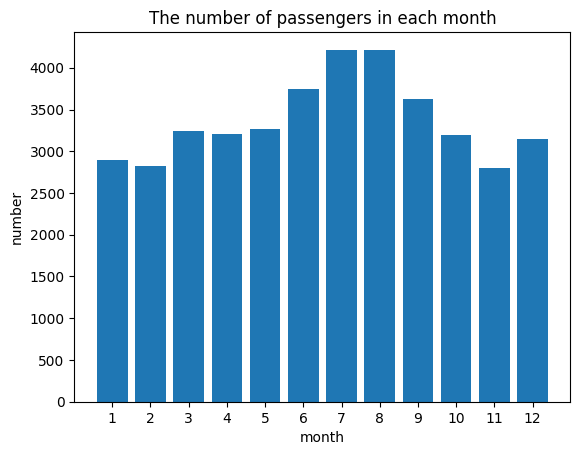

In [4]:
data['month'] = data['month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
data2 = data.groupby('month', observed=False)['passengers'].sum()
plt.bar(data2.index,data2)
plt.xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('number')
plt.title('The number of passengers in each month')

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [5]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


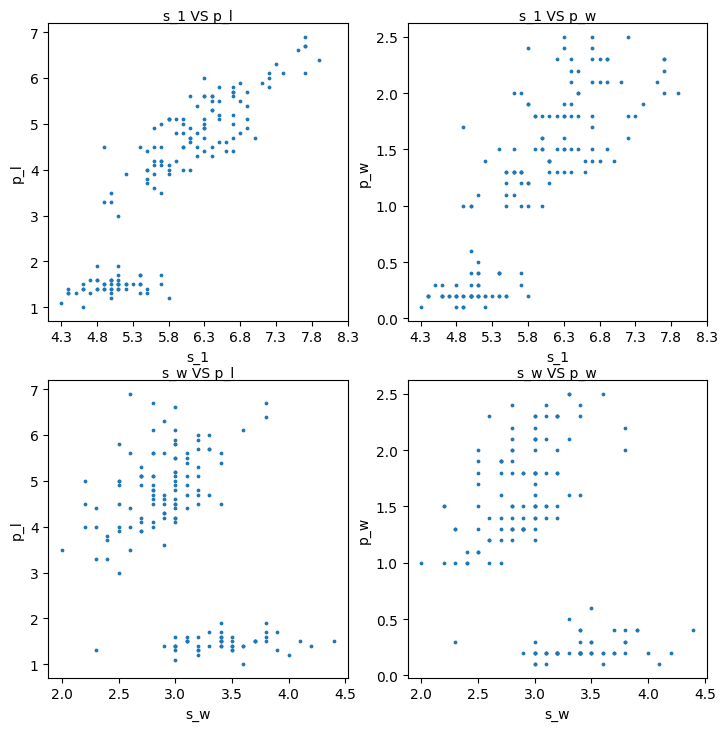

In [6]:
#坐标轴
xlab=['s_1','s_w']
ylab=['p_l','p_w']
#title
title=[[i+' VS '+j for j in ylab] for i in xlab]
fig,axs=plt.subplots(2,2,figsize=(8.5,8.5))
sep=np.array([data['sepal_length'],data['sepal_width']])
pet=np.array([data['petal_length'],data['petal_width']])
#批量画出散点图
for i in range(2):
    for j in range(2):
        axs[i][j].scatter(sep[i],pet[j],s=3)
        axs[i][j].set_xlabel(xlab[i])
        axs[i][j].set_ylabel(ylab[j])
        axs[i][j].set_title(title[i][j],fontsize=10,pad=2)
        axs[i][j].set_xticks(np.arange(np.min(sep[i]),np.max(sep[i]+0.5),0.5))


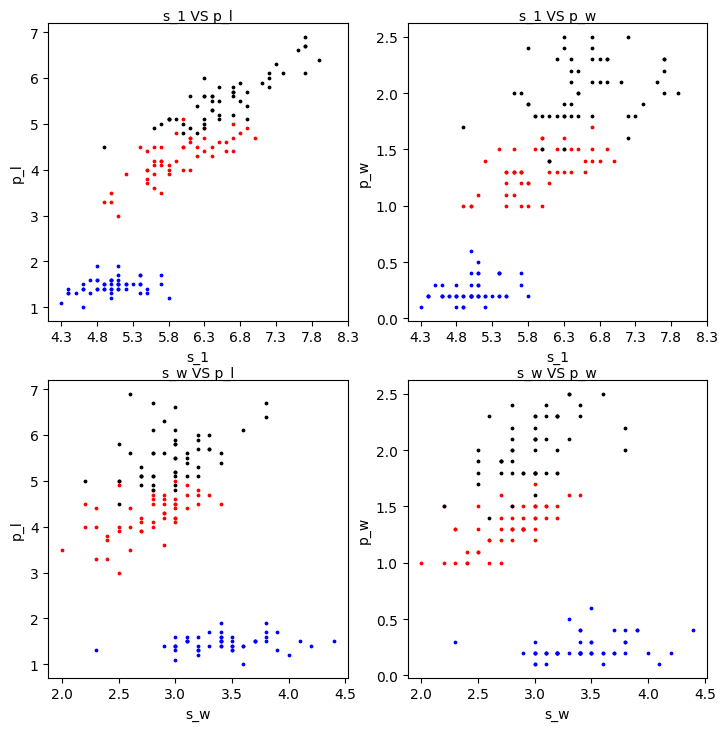

In [7]:
#坐标轴
xlab=['s_1','s_w']
ylab=['p_l','p_w']
species=['setosa','versicolor','virginica']
typecolor=['b','r','k']
#title
title=[[i+' VS '+j for j in ylab] for i in xlab]
fig,axs=plt.subplots(2,2,figsize=(8.5,8.5))
sep=np.array([[data.loc[data['species']=='setosa']['sepal_length'],data.loc[data['species']=='setosa']['sepal_width']],
              [data.loc[data['species']=='versicolor']['sepal_length'],data.loc[data['species']=='versicolor']['sepal_width']],
              [data.loc[data['species']=='virginica']['sepal_length'],data.loc[data['species']=='virginica']['sepal_width']]])
pet=np.array([[data.loc[data['species']=='setosa']['petal_length'],data.loc[data['species']=='setosa']['petal_width']],
              [data.loc[data['species']=='versicolor']['petal_length'],data.loc[data['species']=='versicolor']['petal_width']],
              [data.loc[data['species']=='virginica']['petal_length'],data.loc[data['species']=='virginica']['petal_width']]])
#批量画出散点图
for i in range(2):
    for j in range(2):
        for k in range(3):
            axs[i][j].scatter(sep[k,i],pet[k,j],color=typecolor[k],s=3)
        axs[i][j].set_xlabel(xlab[i])
        axs[i][j].set_ylabel(ylab[j])
        axs[i][j].set_title(title[i][j],fontsize=10,pad=2)
        axs[i][j].set_xticks(np.arange(np.min(sep[:,i]),np.max(sep[:,i]+0.5),0.5))

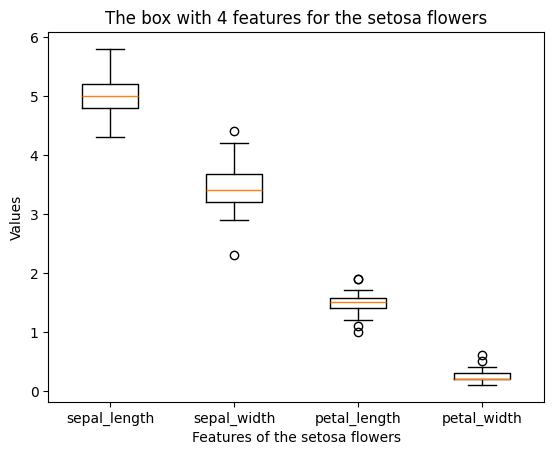

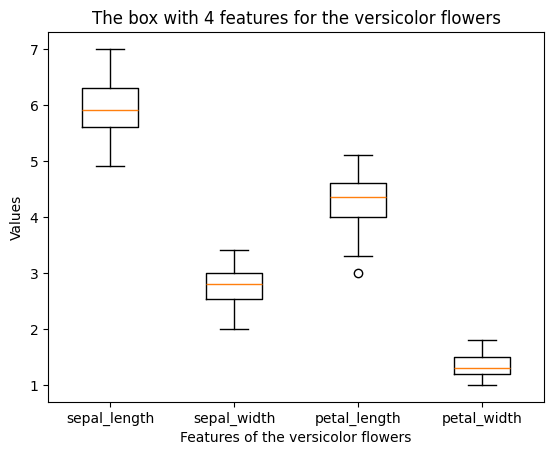

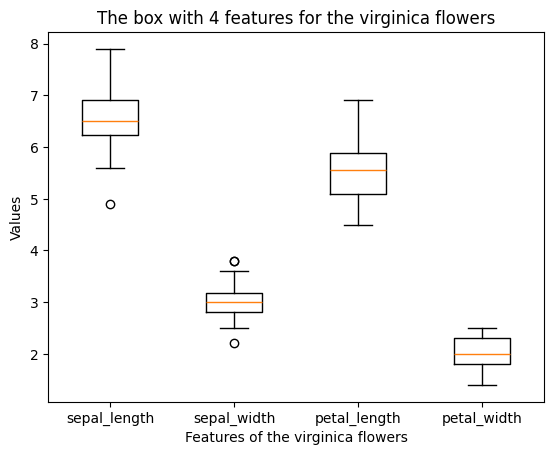

In [8]:
#给出花的种类
spcies=['setosa','versicolor','virginica']
for i in range(len(spcies)):
    data1=data[['sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width']][data["species"]==spcies[i]]
    plt.figure(spcies[i])
    plt.boxplot([data1['sepal_length'],
                            data1['sepal_width'],
                            data1['petal_length'],
                            data1['petal_width']])
    #修改x轴显示，给出坐标轴名称
    plt.xticks([1,2,3,4],labels=data1.keys())
    plt.xlabel('Features of the '+spcies[i]+' flowers')
    plt.ylabel('Values')
    plt.title('The box with 4 features for the '+spcies[i]+' flowers')

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [9]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


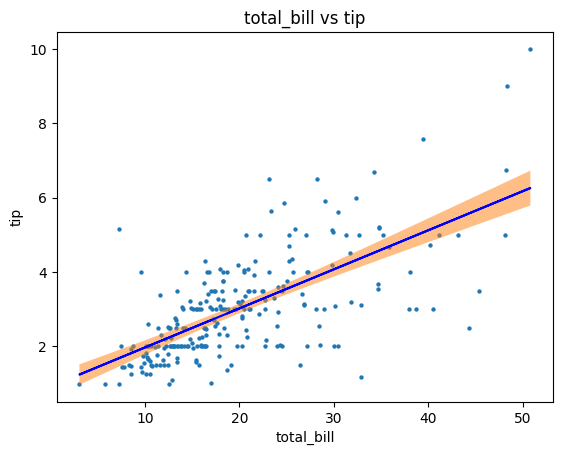

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def sort_three_list(base_list,list1,list2):
    #这里将上下边界按base_list排序，防止画图出现意外。
    li1=np.zeros(len(base_list))
    li2=np.zeros(len(base_list))
    mid_list=np.argsort(base_list)
    for index in range(len(base_list)):
        li1[index]=list1[mid_list[index]]
        li2[index]=list2[mid_list[index]]
    base_list.sort()
    return base_list,li1,li2

def draw_scatter_OLS_fig(x_data,y_data,x_label,y_label,title):
    #画线性回归曲线（最小二乘法）
    #使用相关包函数给出预测值
    x_=sm.add_constant(x_data)
    y_=y_data
    regr=sm.OLS(y_,x_)
    res=regr.fit()

    data2= summary_table(res, alpha=.05)[1]
    fitted_values = data2[:,2]
    low_,upp_=data2[:,4:6].T
    #画真实值的分布
    x2=np.array(x_data)
    x2,y3,y4=sort_three_list(base_list=x2,list1=low_,list2=upp_)
    plt.scatter(x_data,y_data,s=5,linewidths=.9)
    plt.fill_between(x=x2,y1=y3,y2=y4,alpha=.5)
    plt.plot(x_data,fitted_values,'b')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

data1=data[['total_bill','tip']]
draw_scatter_OLS_fig(x_data=data1['total_bill'],
                     y_data=data1['tip'],
                     x_label='total_bill',
                     y_label='tip',
                     title='total_bill vs tip')

Text(0.5, 1.0, 'the box with 2 features for the tip')

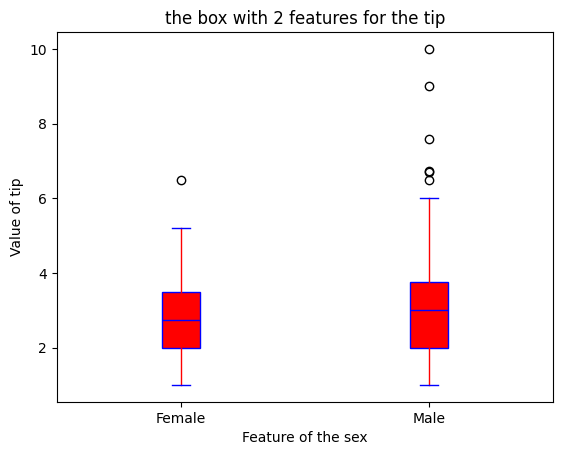

In [11]:
xlabeltype='sex'
type_container=list(set(data[xlabeltype]))
box_list=[]
element_num=len(type_container)
for i in range(element_num):
    box_list.append(data[data[xlabeltype]==type_container[i]]['tip'])

plt.boxplot(box_list,
            patch_artist=True,
            medianprops={'color':'b'},
            boxprops={'facecolor':'r','color':'b'},
            whiskerprops={'color':'r'},
            capprops={'color':'b'})
plt.xticks(range(1,element_num+1),labels=type_container)
plt.xlabel('Feature of the ' + xlabeltype )
plt.ylabel('Value of tip')
plt.title(f'the box with {element_num} features for the tip')
    


Text(0.5, 1.0, 'the box with 2 features for the tip')

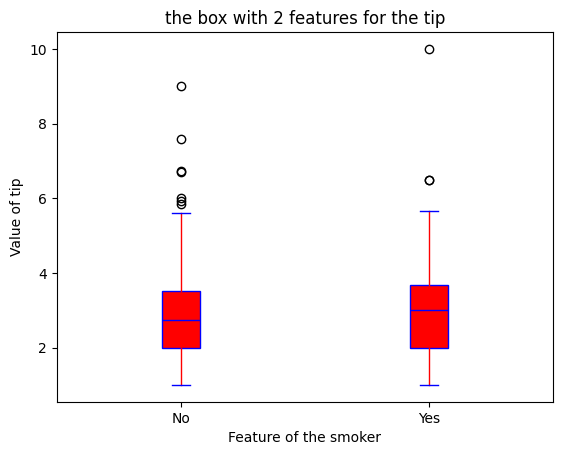

In [12]:
xlabeltype='smoker'
type_container=list(set(data[xlabeltype]))
box_list=[]
element_num=len(type_container)
for i in range(element_num):
    box_list.append(data[data[xlabeltype]==type_container[i]]['tip'])

plt.boxplot(box_list,
            patch_artist=True,
            medianprops={'color':'b'},
            boxprops={'facecolor':'r','color':'b'},
            whiskerprops={'color':'r'},
            capprops={'color':'b'})
plt.xticks(range(1,element_num+1),labels=type_container)
plt.xlabel('Feature of the ' + xlabeltype )
plt.ylabel('Value of tip')
plt.title(f'the box with {element_num} features for the tip')

Text(0.5, 1.0, 'the box with 4 features for the tip')

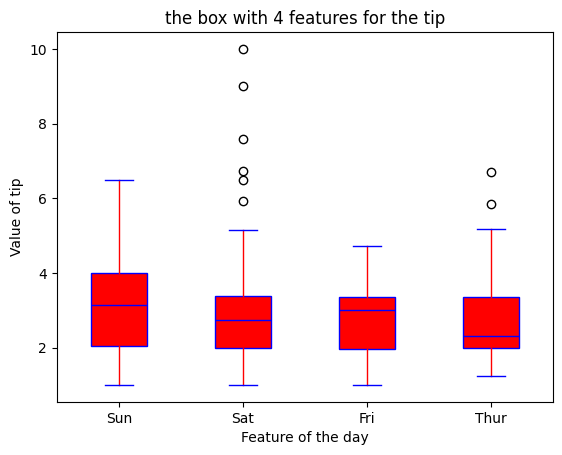

In [13]:
xlabeltype='day'
type_container=list(set(data[xlabeltype]))
box_list=[]
element_num=len(type_container)
for i in range(element_num):
    box_list.append(data[data[xlabeltype]==type_container[i]]['tip'])

plt.boxplot(box_list,
            patch_artist=True,
            medianprops={'color':'b'},
            boxprops={'facecolor':'r','color':'b'},
            whiskerprops={'color':'r'},
            capprops={'color':'b'})
plt.xticks(range(1,element_num+1),labels=type_container)
plt.xlabel('Feature of the ' + xlabeltype )
plt.ylabel('Value of tip')
plt.title(f'the box with {element_num} features for the tip')

Text(0.5, 1.0, 'the box with 2 features for the tip')

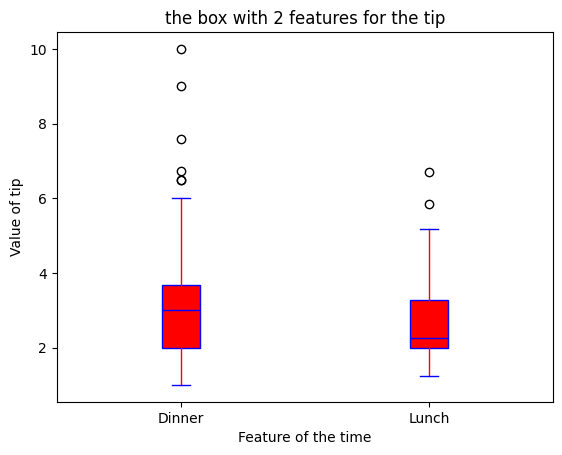

In [14]:
xlabeltype='time'
type_container=list(set(data[xlabeltype]))
box_list=[]
element_num=len(type_container)
for i in range(element_num):
    box_list.append(data[data[xlabeltype]==type_container[i]]['tip'])

plt.boxplot(box_list,
            patch_artist=True,
            medianprops={'color':'b'},
            boxprops={'facecolor':'r','color':'b'},
            whiskerprops={'color':'r'},
            capprops={'color':'b'})
plt.xticks(range(1,element_num+1),labels=type_container)
plt.xlabel('Feature of the ' + xlabeltype )
plt.ylabel('Value of tip')
plt.title(f'the box with {element_num} features for the tip')

Text(0.5, 1.0, 'the box with 6 features for the tip')

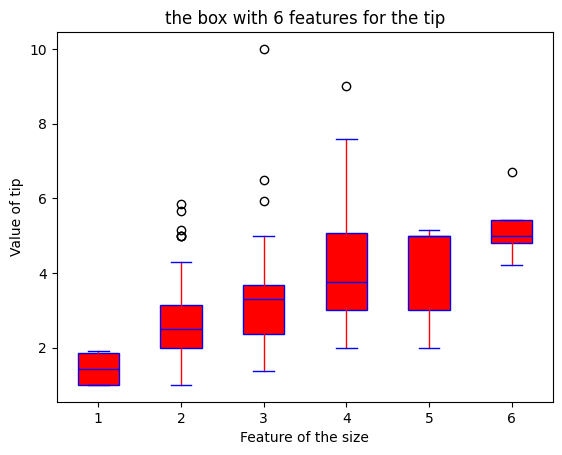

In [15]:
xlabeltype='size'
type_container=list(set(data[xlabeltype]))
box_list=[]
element_num=len(type_container)
for i in range(element_num):
    box_list.append(data[data[xlabeltype]==type_container[i]]['tip'])

plt.boxplot(box_list,
            patch_artist=True,
            medianprops={'color':'b'},
            boxprops={'facecolor':'r','color':'b'},
            whiskerprops={'color':'r'},
            capprops={'color':'b'})
plt.xticks(range(1,element_num+1),labels=type_container)
plt.xlabel('Feature of the ' + xlabeltype )
plt.ylabel('Value of tip')
plt.title(f'the box with {element_num} features for the tip')

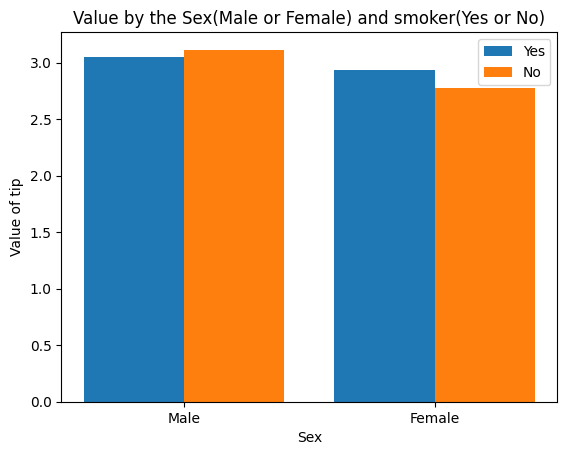

In [16]:
data3=data[['smoker','sex','tip']].pivot_table(index='sex',columns='smoker',values='tip')
num=len(data3)
s_width=1/num
al=np.arange(1,(num)*1.25*1,step=1*1.25)
for i in range(num):
    plt.bar(.1+i*s_width+al,data3[data3.keys()[i]],width=s_width,label=data3.keys()[i])
plt.xticks(.1+al+s_width/2,data3[data3.keys()[0]].keys())
plt.xlabel('Sex')
plt.ylabel('Value of tip')
plt.title('Value by the Sex(Male or Female) and smoker(Yes or No)')
plt.legend(loc='upper right')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [17]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unsurvived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136        80.0  216.0       0.629630         0.370370
2             87        97.0  184.0       0.472826         0.527174
3            119       372.0  491.0       0.242363         0.757637


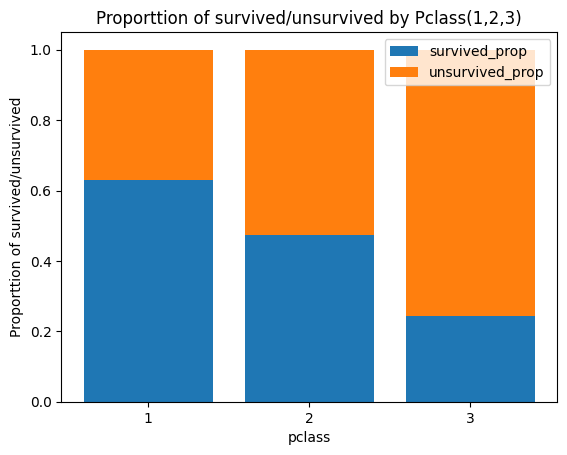

In [18]:
data4=data.loc[:,['survived','pclass']]
data4['total']=np.ones(len(data['survived']))
data4['unsurvived']=data4.loc[:,'total']-data4.loc[:,'survived']
data4=data4[['survived','unsurvived','total','pclass']].groupby('pclass').sum()
data4['survived_prop']=data4.loc[:,'survived']/data4.loc[:,'total']
data4['unsurvived_prop']=data4.loc[:,'unsurvived']/data4.loc[:,'total']
print(data4)
def draw_stackbar(x_,y_data,x_label,y_label,title,width=.5):
    num=len(y_data)
    al=np.arange(width,
                 (num)*1.25*width,
                 step=width*1.25)
    for i in range(len(y_data.keys())):
        if i==0:
            plt.bar(x_+width+al,
                    y_data[y_data.keys()[i]],
                    width=width,
                    label=y_data.keys()[i])
        else:
            plt.bar(x_+width+al,
                    y_data[y_data.keys()[i]],
                    width=width,
                    bottom=y_data[y_data.keys()[i-1]],
                    label=y_data.keys()[i])
            
    plt.xticks(x_+al+width,
               y_data[y_data.keys()[0]].keys())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='upper right')
draw_stackbar(.1,
              y_data=data4[['survived_prop','unsurvived_prop']],
              x_label='pclass',
              y_label='Proporttion of survived/unsurvived',
              title='Proporttion of survived/unsurvived by Pclass(1,2,3)')

        survived  unsurvived  total  survived_prop  unsurvived_prop
sex                                                                
female       233        81.0  314.0       0.742038         0.257962
male         109       468.0  577.0       0.188908         0.811092


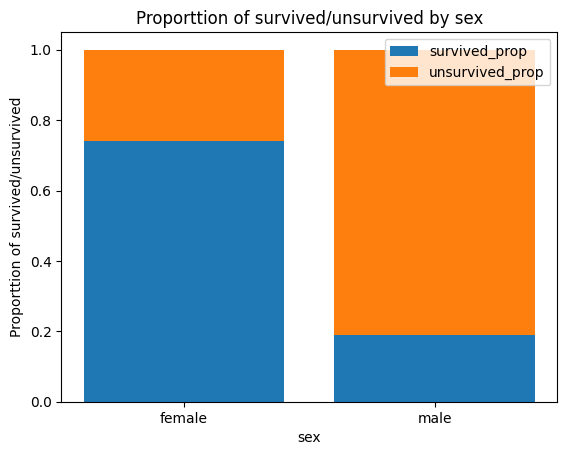

In [19]:
data4=data.loc[:,['survived','sex']]
data4['total']=np.ones(len(data['survived']))
data4['unsurvived']=data4.loc[:,'total']-data4.loc[:,'survived']
data4=data4[['survived','unsurvived','total','sex']].groupby('sex').sum()
data4['survived_prop']=data4.loc[:,'survived']/data4.loc[:,'total']
data4['unsurvived_prop']=data4.loc[:,'unsurvived']/data4.loc[:,'total']
print(data4)

draw_stackbar(.1,
              y_data=data4[['survived_prop','unsurvived_prop']],
              x_label='sex',
              y_label='Proporttion of survived/unsurvived',
              title='Proporttion of survived/unsurvived by sex')

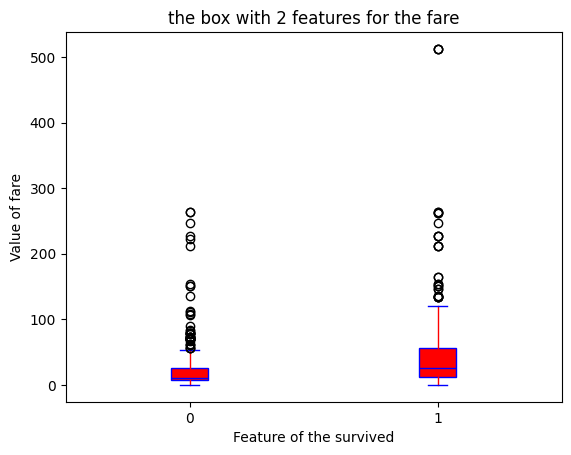

In [20]:
def draw_boxplot(data_,t_name,d_name):
    #绘制箱图函数
    type_container=list(set(data_[t_name]))
    box_list=[]
    element_num=len(type_container)
    for i in range(element_num):
        box_list.append(data_[data_[t_name]==type_container[i]][d_name])

    plt.boxplot(box_list,
                patch_artist=True,
                medianprops={'color':'b'},
                boxprops={'facecolor':'r','color':'b'},
                whiskerprops={'color':'r'},
                capprops={'color':'b'})
    plt.xticks(range(1,element_num+1),labels=type_container)
    plt.xlabel('Feature of the '+t_name)
    plt.ylabel('Value of '+d_name)
    plt.title(f'the box with {element_num} features for the '+d_name)
draw_boxplot(data,d_name='fare',t_name='survived')

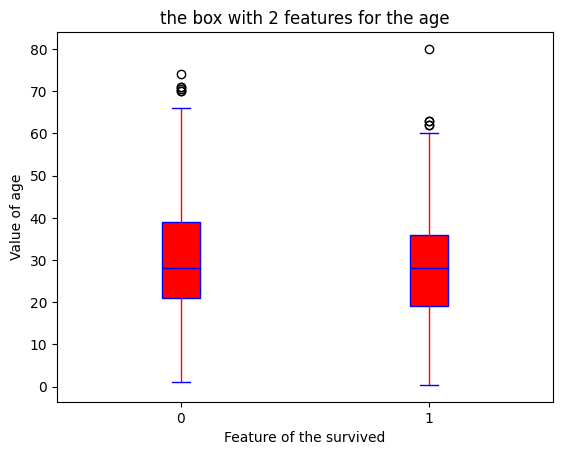

In [21]:
draw_boxplot(data[['age','survived']].dropna(),t_name='survived',d_name='age')

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


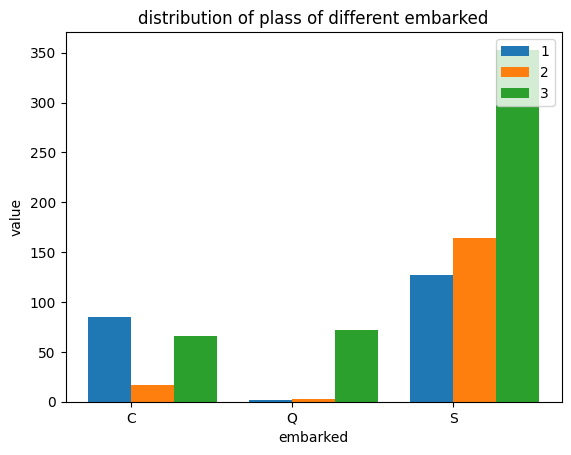

In [22]:
data_e=data.loc[:,['embarked','pclass']]
data_e['value']=np.ones(len(data['embarked']),dtype=np.int8)
data_e=pd.pivot_table(data_e,index='embarked',columns='pclass',values='value',aggfunc='sum')
print(data_e)

num=len(data_e)
s_width=.8/num
al=np.arange(.8,(num)*1.25*.8,step=.8*1.25)
for i in range(num):
    plt.bar(.1+i*s_width+al,data_e[data_e.keys()[i]],width=s_width,label=data_e.keys()[i])
plt.xticks(.1+al+s_width/2,data_e[data_e.keys()[0]].keys())
plt.xlabel('embarked')
plt.ylabel('value')
plt.title('distribution of plass of different embarked')
plt.legend(loc='upper right')



       total
sibsp       
0        608
1        209
2         28
3         16
4         18
5          5
8          7


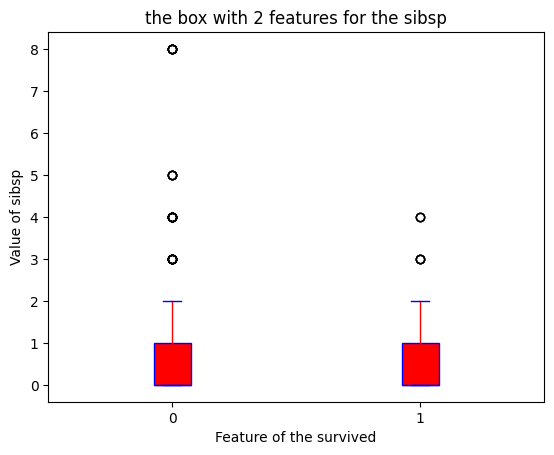

In [23]:
data5=data.loc[:,['sibsp']]
data5['total']=np.ones(len(data['survived']),dtype=int)
data5=data5[['sibsp','total']].groupby('sibsp').sum()
data5.sort_values('total')
print(data5)
draw_boxplot(data,t_name='survived',d_name='sibsp')

       total
parch       
0        678
1        118
2         80
3          5
4          4
5          5
6          1


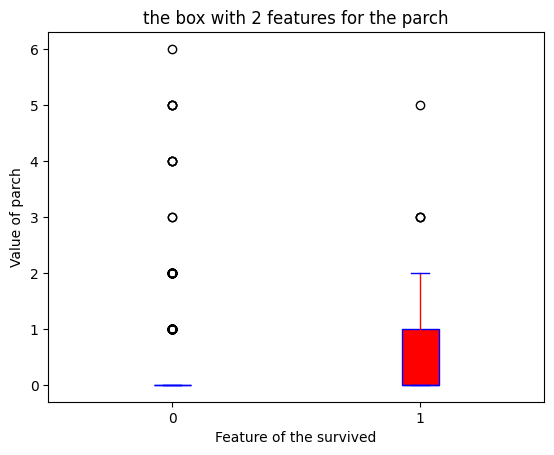

In [24]:
data5=data.loc[:,['parch']]
data5['total']=np.ones(len(data['survived']),dtype=int)
data5=data5[['parch','total']].groupby('parch').sum()
data5.sort_values('total')
print(data5)
draw_boxplot(data,d_name='parch',t_name='survived')

survived    0    1
alone             
False     175  179
True      374  163


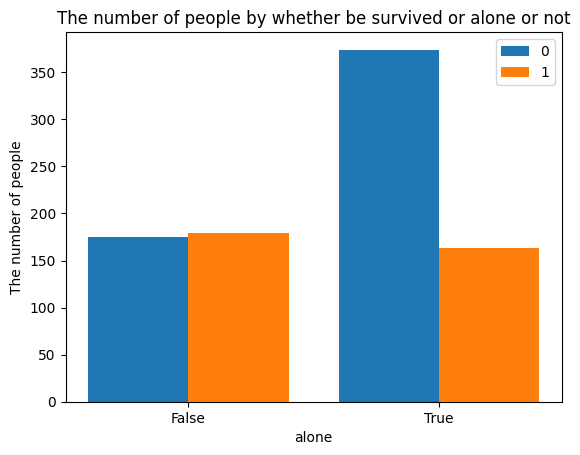

In [25]:
data_b=data.loc[:,['survived','alone']]
data_b['value']=np.ones(len(data.loc[:,'alone']),dtype=np.int8)
data_b=data_b.pivot_table(index='alone',columns='survived',values='value',aggfunc='sum')
print(data_b)
num=len(data_b)
s_width=.8/num
al=np.arange(.8,(num)*1.25*.8,step=.8*1.25)
for i in range(num):
    plt.bar(.1+i*s_width+al,data_b[data_b.keys()[i]],width=s_width,label=data_b.keys()[i])
plt.xticks(.1+al+s_width/2,data_b[data_b.keys()[0]].keys())
plt.xlabel('alone')
plt.ylabel('The number of people')
plt.title('The number of people by whether be survived or alone or not')
plt.legend(loc='upper right')